# RRSv1:
RRSv1 invovles generating random reference set for the SVM by performing randomization on protein pairs from the PRS
and filtering out random pairs that coincide with known PPIs. The resulting pairs are scanned for SLiM matches and domain
matches and DMI matches are detected between the random pairs.

## Make plots of the RRS:
- Make some stats on how many proteins present in the RRS, how many known PPIs, how many SLiM types, how many domains...
- For each SLiM type, how many proteins have at least 1 SLiM match of that SLiM type.
- Show the domain frequency of each cognate domain in the DMI list in the human proteome.
- How many DMIMatch for each DMI type can we get in x number of random protein pairs...
- Show the distribution of SLiM matches among SLiM classes

In [1]:
import sys
sys.path.insert(1, '/Users/johnlee/Coding/Python/DMI/RRS')
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np
from RRSv1_formation import *
with open('test_RRS_with_DMI_matches.pickle', 'rb') as pickle_file:
    RRSv1= pickle.load(pickle_file)

### Stats:
- No. of proteins in RRSv1/PRS = 1,219
- No. of DMI match instance in RRSv1= 4099
- No. of SLiM types= 290
- No. of SLiM types with at least 1 match found in the RRSv1= 274
- No. of SLiM types without a match in the RRSv1= 16
- No. of cognate domains= 131
- No. of cognate domains found in RRSv1= 86
- No. of cognate domains not found in RRSv1= 45
- No. of known PPIs= 145,676
- No. of DMI types with at least 1 match in the RRSv1= 221
- No. of DMI types that do not have at least 20 instances in the RRSv1= 23

In [2]:
290-(131-45)

204

In [3]:
DMI_set= set()
for k,v in RRSv1.protein_pairs_dict.items():
    for i in v.dmi_matches_dict.keys():
        DMI_set.add(i)

In [4]:
len(RRSv1.RRS_instances)

4099

### SLiM analysis
--------------------------------------------------------------------------------------

In [6]:
slim_types_list= []
for slimtype in RRSv1.SLiM_types_dict.values():
    slim_types_list.append(slimtype.slim_id)
len(slim_types_list)

290

In [9]:
slim_types_count_dict= {}
for slimtype in slim_types_list:
    slim_types_count_dict[slimtype]= 0
    for protein, protein_inst in RRSv1.proteins_dict.items():
        if slimtype in protein_inst.slim_matches_dict:
            slim_types_count_dict[slimtype] += 1
slim_types_count_dict

{'ELME000321': 854,
 'ELME000172': 103,
 'ELME000102': 1140,
 'ELME000101': 364,
 'ELME000108': 1130,
 'ELME000100': 995,
 'ELME000103': 376,
 'ELME000146': 1170,
 'ELME000330': 4,
 'ELME000331': 263,
 'ELME000192': 5,
 'ELME000231': 598,
 'ELME000232': 177,
 'ELME000342': 15,
 'ELME000426': 118,
 'ELME000323': 8,
 'ELME000324': 8,
 'ELME000389': 1,
 'ELME000390': 56,
 'ELME000391': 0,
 'ELME000392': 3,
 'ELME000184': 97,
 'ELME000355': 91,
 'ELME000351': 81,
 'ELME000352': 195,
 'ELME000353': 85,
 'ELME000354': 12,
 'ELME000248': 72,
 'ELME000350': 0,
 'ELME000289': 355,
 'ELME000292': 159,
 'ELME000322': 20,
 'ELME000347': 0,
 'ELME000269': 121,
 'ELME000241': 27,
 'ELME000388': 529,
 'ELME000304': 41,
 'ELME000308': 15,
 'ELME000310': 7,
 'ELME000097': 228,
 'ELME000358': 780,
 'ELME000106': 811,
 'ELME000386': 2,
 'ELME000433': 295,
 'ELME000234': 114,
 'ELME000233': 1039,
 'ELME000437': 1,
 'ELME000434': 218,
 'ELME000422': 184,
 'ELME000432': 971,
 'ELME000423': 276,
 'ELME000411

In [10]:
no_slim_match= [k for k,v in slim_types_count_dict.items() if v != 0]
len(no_slim_match)

274

In [11]:
slim_types_count_dict= dict(sorted(slim_types_count_dict.items(), key= lambda x:x[1]))
slim_types_count_dict

{'ELME000391': 0,
 'ELME000350': 0,
 'ELME000347': 0,
 'ELME000348': 0,
 'ELME000325': 0,
 'ELME000129': 0,
 'ELME000378': 0,
 'ELME000021': 0,
 'ELME000022': 0,
 'ELME000419': 0,
 'ELME000175': 0,
 'ELME000092': 0,
 'ELME000152': 0,
 'ELME000256': 0,
 'ELME000132': 0,
 'ELME000187': 0,
 'ELME000389': 1,
 'ELME000437': 1,
 'ELME000440': 1,
 'ELME000236': 1,
 'ELME000387': 1,
 'ELME000116': 1,
 'ELME000130': 1,
 'ELME000104': 1,
 'ELME000168': 1,
 'ELME000150': 1,
 'ELME000131': 1,
 'ELME000386': 2,
 'ELME000374': 2,
 'ELME000384': 2,
 'ELME000010': 2,
 'ELME000392': 3,
 'ELME000468': 3,
 'ELME000299': 3,
 'ELME000385': 3,
 'ELME000420': 3,
 'ELME000330': 4,
 'ELME000315': 4,
 'ELME000255': 4,
 'ELME000383': 4,
 'ELME000339': 4,
 'ELME000377': 4,
 'ELME000380': 4,
 'ELME000379': 4,
 'ELME000119': 4,
 'ELME000192': 5,
 'ELME000349': 5,
 'ELME000375': 5,
 'ELME000046': 5,
 'ELME000170': 5,
 'ELME000327': 5,
 'ELME000359': 5,
 'ELME000447': 5,
 'ELME000013': 5,
 'ELME000357': 6,
 'ELME0001

In [12]:
# How sorting a dict by its values as the 'key' works:
p = [(3, 3), (4, 2), (2, 2), (5, 2), (1, 7)] 

q = sorted(p, key=lambda x: x[0]*x[1]) 
print(q) # [(2, 2), (1, 7), (4, 2), (3, 3), (5, 2)] 

[(2, 2), (1, 7), (4, 2), (3, 3), (5, 2)]


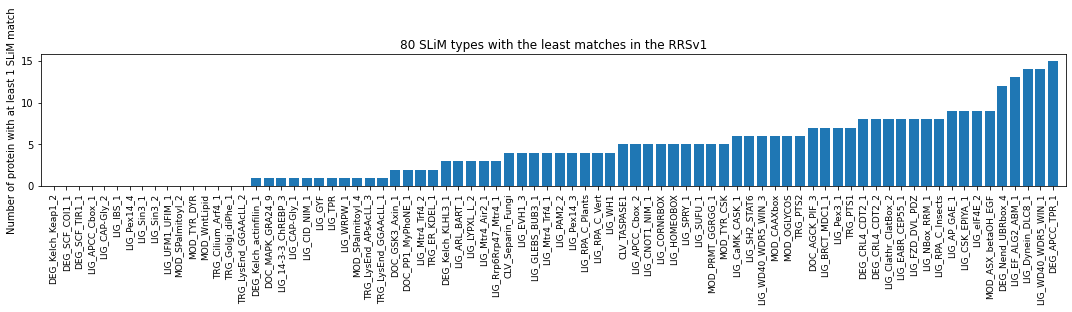

In [13]:
# sort dict in ascending order
n= 80
slim_types_count_keys= list(slim_types_count_dict.keys())
slim_types_count_values= list(slim_types_count_dict.values())

plt.figure(figsize=(15, 4))
plt.bar([RRSv1.SLiM_types_dict[slim_type].name for slim_type in slim_types_count_keys[:n]],
        slim_types_count_values[:n])
# plt.yscale('log')
plt.xticks([RRSv1.SLiM_types_dict[slim_type].name for slim_type in slim_types_count_keys[:n]], rotation= 90,
          fontsize= 9)
plt.xlim([-1, n])
plt.title('80 SLiM types with the least matches in the RRSv1')
plt.ylabel('Number of protein with at least 1 SLiM match')
plt.tight_layout()

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/slim_types_least_match_in_RRSv1.pdf')

plt.show()

16 SLiM types do not have a match in the RRSv1.

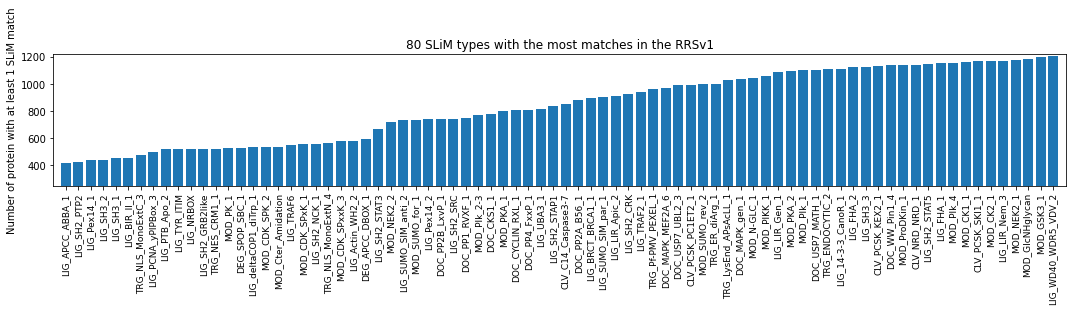

In [14]:
# sort dict in ascending order
n= -80
slim_types_count_keys= list(slim_types_count_dict.keys())
slim_types_count_values= list(slim_types_count_dict.values())

plt.figure(figsize=(15, 4))
plt.bar([RRSv1.SLiM_types_dict[slim_type].name for slim_type in slim_types_count_keys[n:]],
        slim_types_count_values[n:])
# plt.yscale('log')
plt.xticks([RRSv1.SLiM_types_dict[slim_type].name for slim_type in slim_types_count_keys[n:]], rotation= 90,
          fontsize= 9)
plt.xlim([-1, -n])
plt.ylim([250, 1219])
plt.title('80 SLiM types with the most matches in the RRSv1')
plt.ylabel('Number of protein with at least 1 SLiM match')
plt.tight_layout()

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/slim_types_most_match_in_RRSv1.pdf')

plt.show()

In [15]:
slim_class_count_dict= {}
for slim_type, count in slim_types_count_dict.items():
    slim_name= RRSv1.SLiM_types_dict[slim_type].name
    slim_class= slim_name[:3]
    slim_class_count_dict[slim_class] = slim_class_count_dict.get(slim_class, 0) + count

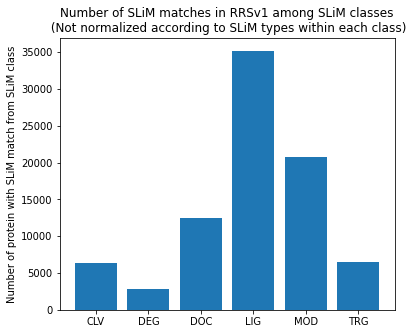

In [16]:
slim_class_count_dict= dict(sorted(slim_class_count_dict.items(), key=lambda item: item[0]))


plt.figure(figsize= (6,5))
plt.bar(slim_class_count_dict.keys(), slim_class_count_dict.values())
plt.title('Number of SLiM matches in RRSv1 among SLiM classes\n (Not normalized according to SLiM types within each class)')
plt.ylabel('Number of protein with SLiM match from SLiM class')

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/unnormalized_slim_matches_by_class_RRSv1.pdf')

plt.show()

This distribution of SLiM matches among classes is NOT normalized.

In [17]:
slim_types_in_class_dict= {}
for k,v in slim_types_count_dict.items():
    name= RRSv1.SLiM_types_dict[k].name
    slim_class= name[:3]
    slim_types_in_class_dict[slim_class]= slim_types_in_class_dict.get(slim_class, 0) + 1
slim_types_in_class_dict= dict(sorted(slim_types_in_class_dict.items(), key= lambda item:item[0]))
slim_types_in_class_dict

{'CLV': 11, 'DEG': 25, 'DOC': 31, 'LIG': 164, 'MOD': 37, 'TRG': 22}

In [18]:
normalized_slim_class_count_dict= {}
for k,v in slim_class_count_dict.items():
    normalized_slim_class_count_dict[k]= round(v/slim_types_in_class_dict[k])
normalized_slim_class_count_dict

{'CLV': 582, 'DEG': 113, 'DOC': 401, 'LIG': 214, 'MOD': 562, 'TRG': 295}

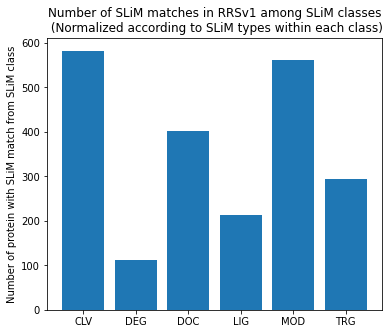

In [19]:
plt.figure(figsize= (6,5))
plt.bar(normalized_slim_class_count_dict.keys(), normalized_slim_class_count_dict.values())
plt.title('Number of SLiM matches in RRSv1 among SLiM classes\n (Normalized according to SLiM types within each class)')
plt.ylabel('Number of protein with SLiM match from SLiM class')

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/normalized_slim_matches_by_class_RRSv1.pdf')

plt.show()

After normalizing the distribution of SLiM match among SLiM class according to the distribution of SLiM types among SLiM class, the CLV class now has the higher amount of SLiM match in the RRSv1.  

### Domain analysis
--------------------------------------------------------------------------------------

In [20]:
domain_list= []
for k in RRSv1.domain_types_dict:
    domain_list.append(k)
len(domain_list)

131

In [22]:
domain_count_dict= {}
for domain in domain_list:
    domain_count_dict[domain]= 0
    for protein, protein_inst in RRSv1.proteins_dict.items():
        if domain in protein_inst.domain_matches_dict:
            domain_count_dict[domain] += 1
len(domain_count_dict)

131

In [23]:
d= [k for k,v in domain_count_dict.items() if v== 0]
len(d)

45

In [24]:
proteins_with_cognate_domains= {}
for d in domain_list:
    proteins_with_cognate_domains[d]= 0
    for v in RRSv1.proteins_dict.values():
        if d in v.domain_matches_dict:
            proteins_with_cognate_domains[d] +=1 
proteins_with_cognate_domains= dict(sorted(proteins_with_cognate_domains.items(), key= lambda item:item[1]))
proteins_with_cognate_domains

{'PF00675': 0,
 'PF01112': 0,
 'PF02617': 0,
 'SM00370': 0,
 'SM01084': 0,
 'PF03145': 0,
 'PF02985': 0,
 'SM00809': 0,
 'PF02296': 0,
 'SM00238': 0,
 'SM01052': 0,
 'SM00582': 0,
 'PF00928': 0,
 'PF01221': 0,
 'PF02301': 0,
 'PF16756': 0,
 'PF04882': 0,
 'SM00392': 0,
 'PF08784': 0,
 'PF04000': 0,
 'PF08066': 0,
 'PF02671': 0,
 'PF11976': 0,
 'PF03271': 0,
 'PF00899': 0,
 'PF03671': 0,
 'PF05118': 0,
 'PF00432': 0,
 'PF01239': 0,
 'PF00535': 0,
 'PF01082': 0,
 'PF02485': 0,
 'PF02516': 0,
 'PF01233': 0,
 'PF02799': 0,
 'PF10250': 0,
 'PF02709': 0,
 'PF06325': 0,
 'PF01529': 0,
 'PF03062': 0,
 'SM01020': 0,
 'PF00810': 0,
 'PF01217': 0,
 'PF08389': 0,
 'PF00026': 0,
 'PF00082': 1,
 'PF03568': 1,
 'PF02747': 1,
 'SM00612': 1,
 'SM00396': 1,
 'SM00702': 1,
 'PF12436': 1,
 'SM00101': 1,
 'PF11527': 1,
 'PF01394': 1,
 'PF04054': 1,
 'SM01268': 1,
 'PF00389': 1,
 'PF12180': 1,
 'SM00027': 1,
 'PF01652': 1,
 'SM00444': 1,
 'PF13415': 1,
 'SM00300': 1,
 'SM00327': 1,
 'SM01243': 1,
 'PF13949'

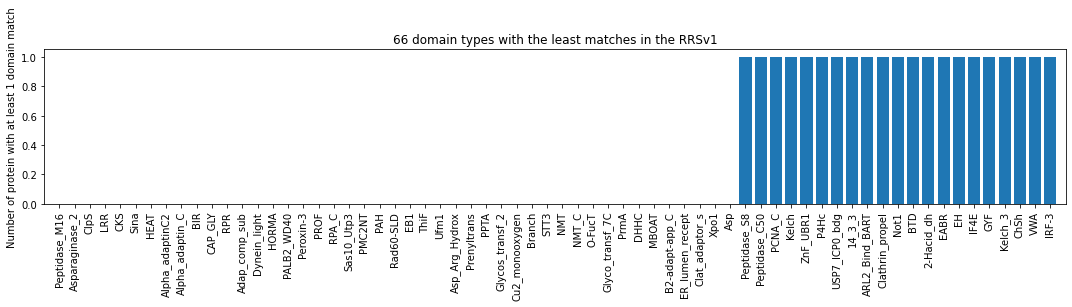

In [25]:
n= 66
keys= list(proteins_with_cognate_domains.keys())
values= list(proteins_with_cognate_domains.values())

plt.figure(figsize=(15, 4))
plt.bar([RRSv1.domain_types_dict[domain_id].name for domain_id in keys[:n]],
        values[:n])
# plt.yscale('log')
plt.xticks([RRSv1.domain_types_dict[domain_id].name for domain_id in keys[:n]], rotation= 90,
          fontsize= 10)
plt.xlim([-1, n])
# plt.ylim([250, 1219])
plt.title(f'{n} domain types with the least matches in the RRSv1')
plt.ylabel('Number of protein with at least 1 domain match')
plt.tight_layout()

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/domain_types_least_match_in_RRSv1.pdf')

plt.show()

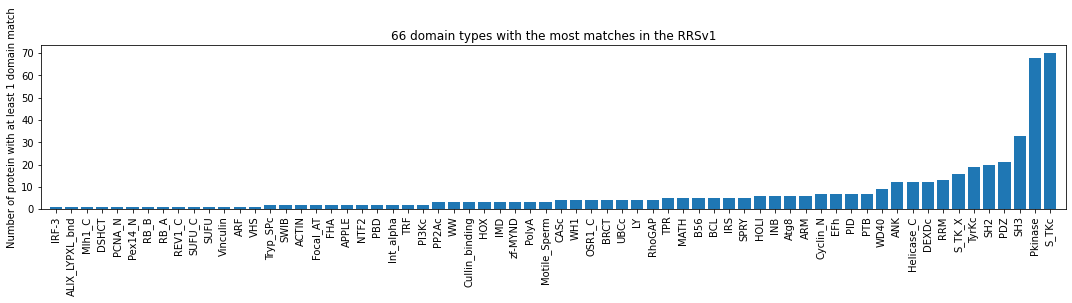

In [26]:
n= 66
keys= list(proteins_with_cognate_domains.keys())
values= list(proteins_with_cognate_domains.values())

plt.figure(figsize=(15, 4))
plt.bar([RRSv1.domain_types_dict[domain_id].name for domain_id in keys[-n:]],
        values[-n:])
# plt.yscale('log')
plt.xticks([RRSv1.domain_types_dict[domain_id].name for domain_id in keys[-n:]], rotation= 90,
          fontsize= 10)
plt.xlim([-1, n])
# plt.ylim([250, 1219])
plt.title(f'{n} domain types with the most matches in the RRSv1')
plt.ylabel('Number of protein with at least 1 domain match')
plt.tight_layout()

plt.savefig('/Users/johnlee/Coding/Python/DMI/RRS/Plots/domain_types_most_match_in_RRSv1.pdf')

plt.show()

### DMI analysis
------------------------

In [27]:
import pandas as pd
pd.set_option('display.max_rows', None)
df= pd.read_csv('test_RRS.tsv', sep= '\t', index_col=0)

In [28]:
DMI_list= df.Elm.to_list()
DMI_list_dict= {}
for dmi in DMI_list:
    DMI_list_dict[dmi]= DMI_list_dict.get(dmi, 0) +1
DMI_list_less_20= [k for k,v in DMI_list_dict.items() if v <20]
len(DMI_list_less_20)

23

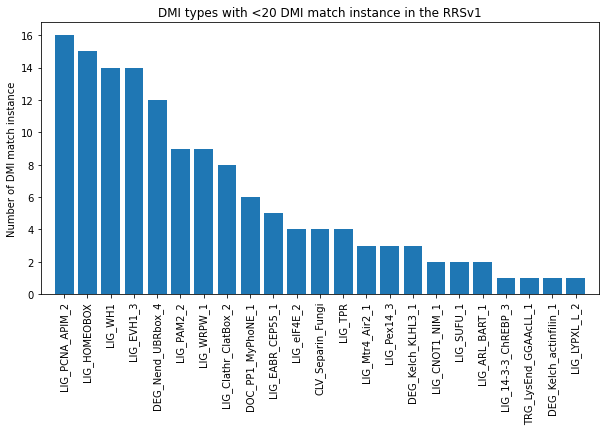

In [29]:
DMI_types_counts= df['Elm'].value_counts()
sel= DMI_types_counts.loc[DMI_types_counts.values <20]

plt.figure(figsize= (10,5))
plt.bar(sel.index, sel.values)
plt.xticks(sel.index, rotation= 90, fontsize= 10)
plt.xlim([-1, len(sel)])

plt.title('DMI types with <20 DMI match instance in the RRSv1')
plt.ylabel('Number of DMI match instance')
plt.show()

In [30]:
DMI_df= pd.DataFrame(df['Elm'].unique())
DMI_df= DMI_df.rename(columns= {0: 'Elm'})
DMI_df['Class']= DMI_df.Elm.str.slice(stop= 3)
DMI_count= pd.DataFrame(DMI_df.Class.value_counts())
DMI_count= DMI_count.rename(columns={'Class': 'RRSv1'})
DMI_count

,RRSv1
LIG,130
DOC,29
MOD,22
DEG,19
TRG,12
CLV,9


In [31]:
keys= pd.Series(list(slim_types_in_class_dict.keys()))
values= pd.Series(list(slim_types_in_class_dict.values()))
ELMDB= pd.concat([keys, values], axis= 1)
ELMDB= ELMDB.rename(columns= {0:'Class', 1:'ElmDB'})
ELMDB

,Class,ElmDB
0,CLV,11
1,DEG,25
2,DOC,31
3,LIG,164
4,MOD,37
5,TRG,22


In [32]:
merged= DMI_count.merge(ELMDB, how= 'left', left_on= DMI_count.index, right_on= 'Class')
sel= ['Class', 'RRSv1', 'ElmDB']
DMI_count= merged[sel]
DMI_count

,Class,RRSv1,ElmDB
0,LIG,130,164
1,DOC,29,31
2,MOD,22,37
3,DEG,19,25
4,TRG,12,22
5,CLV,9,11


In [33]:
DMI_count['frac']= DMI_count['RRSv1']/DMI_count['ElmDB']
DMI_count

<ipython-input-33-ab0e8a0ea428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DMI_count['frac']= DMI_count['RRSv1']/DMI_count['ElmDB']


,Class,RRSv1,ElmDB,frac
0,LIG,130,164,0.792683
1,DOC,29,31,0.935484
2,MOD,22,37,0.594595
3,DEG,19,25,0.760000
4,TRG,12,22,0.545455
5,CLV,9,11,0.818182


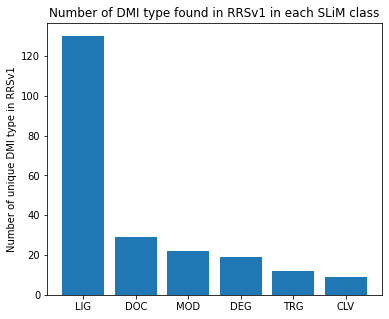

In [34]:
plt.figure(figsize= (6,5))
plt.bar(DMI_count.Class, DMI_count.RRSv1)
plt.title('Number of DMI type found in RRSv1 in each SLiM class')
plt.ylabel('Number of unique DMI type in RRSv1')
plt.show()

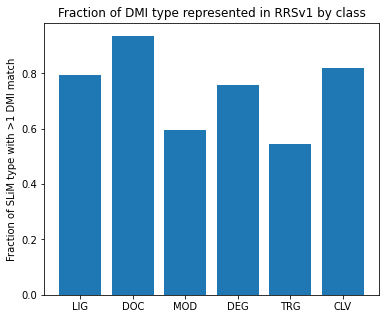

In [35]:
plt.figure(figsize= (6,5))
plt.bar(DMI_count.Class, DMI_count.frac)
plt.title('Fraction of DMI type represented in RRSv1 by class')
plt.ylabel('Fraction of SLiM type with >1 DMI match')
plt.show()

In [36]:
df.head()

,Elm,interactorElm,ElmMatch,IUPredLong,IUPredShort,Anchor,interactorDomain,Domain_ID1,DomainMatch1,Evalue1,Domain_ID2,DomainMatch2,Evalue2
,,,,,,,,,,,,,
1,CLV_C14_Caspase3-7,Q91757,396-400,0.850455,0.66760,0.136356,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN
2,CLV_C14_Caspase3-7,P36956,832-836,0.256111,0.38512,0.353938,P55212,SM00115,36-290,0.0,NaN,NaN,NaN
3,CLV_C14_Caspase3-7,O14686,2137-2141,0.787482,0.60044,0.896515,P42574,SM00115,36-277,0.0,NaN,NaN,NaN
4,CLV_C14_Caspase3-7,Q62799,1314-1318,0.441369,0.31768,0.442594,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN
5,CLV_C14_Caspase3-7,Q9UQF2,405-409,0.401703,0.32258,0.411480,Q14790,SM00115,225-478,3.9e-129,NaN,NaN,NaN


In [37]:
evalues= []
for i, r in df.iterrows():
    ev= ''
    ev2= ''
    if type(r['Evalue1']) == str:
        ev= r['Evalue1'].split('|')
        for e in ev:
            evalues.append(float(e))
    else:
        evalues.append(float(r['Evalue1']))
    if pd.isna(r['Evalue2']) == False:
        if type(r['Evalue2']) == str:
            ev2= r['Evalue2'].split('|')
            for e2 in ev2:
                evalues.append(float(e2))
        else:
            evalues.append(float(r['Evalue2']))
len(evalues)

9024

In [38]:
min([e for e in evalues if e>0])

3.3e-129

In [39]:
import numpy as np
b= np.logspace(np.log10(min([e for e in evalues if e != 0])), np.log10(max(evalues)), 50)
b

array([3.30000000e-129, 1.62647079e-126, 8.01638553e-124, 3.95103542e-121,
       1.94734657e-118, 9.59788581e-116, 4.73050936e-113, 2.33152584e-110,
       1.14913899e-107, 5.66376062e-105, 2.79149733e-102, 1.37584511e-099,
       6.78112691e-097, 3.34221359e-094, 1.64727659e-091, 8.11893110e-089,
       4.00157705e-086, 1.97225702e-083, 9.72066192e-081, 4.79102201e-078,
       2.36135071e-075, 1.16383877e-072, 5.73621142e-070, 2.82720615e-067,
       1.39344491e-064, 6.86787106e-062, 3.38496717e-059, 1.66834855e-056,
       8.22278843e-054, 4.05276520e-051, 1.99748613e-048, 9.84500858e-046,
       4.85230875e-043, 2.39155710e-040, 1.17872659e-037, 5.80958901e-035,
       2.86337176e-032, 1.41126986e-029, 6.95572483e-027, 3.42826765e-024,
       1.68969006e-021, 8.32797430e-019, 4.10460816e-016, 2.02303796e-013,
       9.97094589e-011, 4.91437946e-008, 2.42214989e-005, 1.19380486e-002,
       5.88390524e+000, 2.90000000e+003])

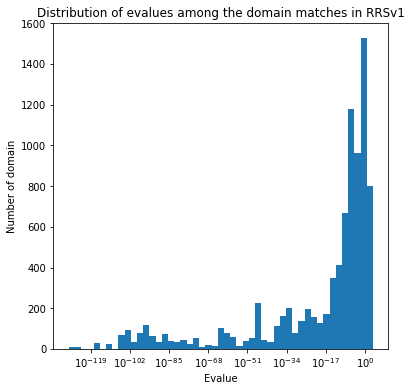

In [40]:
plt.figure(figsize= (6,6))
plt.hist([e for e in evalues if e != 0], bins= b)
plt.title('Distribution of evalues among the domain matches in RRSv1')
plt.ylabel('Number of domain')
plt.xlabel('Evalue')
plt.xscale('log')

plt.show()

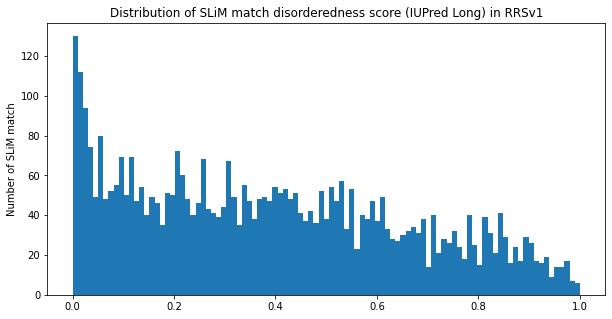

In [41]:
b= np.linspace(0, 1, 100)

plt.figure(figsize= (10,5))
plt.hist(df.IUPredLong, bins= b)
plt.title('Distribution of SLiM match disorderedness score (IUPred Long) in RRSv1')
plt.ylabel('Number of SLiM match')

plt.show()

Distribution of IUPred Long score is skewed to the left, meaning that most of the matches are found in ordered region of a protein.

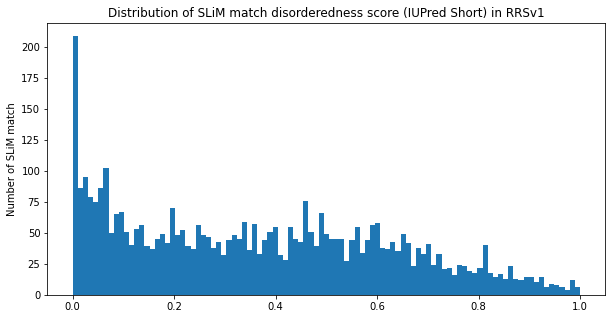

In [42]:
b= np.linspace(0, 1, 100)

plt.figure(figsize= (10, 5))
plt.hist(df.IUPredShort, bins= b)
plt.title('Distribution of SLiM match disorderedness score (IUPred Short) in RRSv1')
plt.ylabel('Number of SLiM match')

plt.show()

Distribution of IUPred Short score is also skewed to the left, meaning that most of the matches are found in ordered regions of a protein

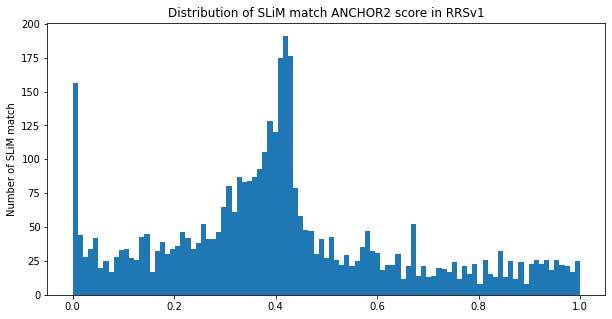

In [43]:
b= np.linspace(0, 1, 100)

plt.figure(figsize= (10,5))
plt.hist(df.Anchor, bins= b)
plt.title('Distribution of SLiM match ANCHOR2 score in RRSv1')
plt.ylabel('Number of SLiM match')

plt.show()

ANCHOR2 predicts disordered binding regions. The higher the score, the more likely that it is a disordered binding regions. The distribution of ANCHOR2 in the RRSv1 is centered around 0.4 with a peak at 0. According to the paper of IUPred2a, regions with higher than 0.6 are predicted to be disordered binding regions.